In [ ]:
import numpy as np
import matplotlib
import shutil
import glob
import os
import math
!pip install sciPY
import scipy
!pip install matplotlib
import numpy as np
import matplotlib
import shutil
import glob
import os
import math
!pip install Pillow
!pip install tensorflow
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
#from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential  # Assuming TensorFlow 2.0+
import keras
!pip install keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
!pip install keras-preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.regularizers import l1, l2
import PIL.Image
from tensorflow.keras.preprocessing.image import load_img

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.1 MB/s eta 0:00:00


In [ ]:
! pip install --upgrade pip
!pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 27.5 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 24.1.2
    Uninstalling pip-24.1.2:
      Successfully uninstalled pip-24.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 26.2 MB/s  0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.3.0
    Uninstalling pillow-11.3.0:
      Successfully uninstalled pillow-11.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gradio 5.50.0 requires pillow<12.0,>=8.0, but you have pillow 12.1.0 which is incompatible.


In [ ]:
import zipfile
import os

# Specify the path to your zip file
zip_file_path = '/content/42.zip'

# Specify the directory where you want to extract the files
extract_to_dir = '/content/84unzip'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_to_dir, exist_ok=True)

# Open the zip file and extract its contents
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_dir)

# Print a message indicating the extraction directory
print(f"Files extracted to {extract_to_dir}")

Files extracted to /content/84unzip


In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

benign_input = '/content/84unzip/1111/Bengin cases'
benign_output = '/content/88unzip/777/Bengin cases'
os.makedirs(benign_output, exist_ok=True)

target_benign = 700
current_benign = len([f for f in os.listdir(benign_input) if f.lower().endswith(('.png','.jpg','.jpeg'))])
benign_needed = target_benign - current_benign

print("Benign current:", current_benign)
print("Benign to generate:", benign_needed)

datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

generated = 0
image_files = [f for f in os.listdir(benign_input) if f.lower().endswith(('.png','.jpg','.jpeg'))]

while generated < benign_needed:
    for img_file in image_files:
        img = load_img(os.path.join(benign_input, img_file))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in datagen.flow(x, batch_size=1, save_to_dir=benign_output,
                                  save_prefix='benign_aug', save_format='jpeg'):
            generated += 1
            if generated >= benign_needed:
                break
    if generated >= benign_needed:
        break

print("✅ Benign augmentation done")

Benign current: 120
Benign to generate: 580
✅ Benign augmentation done


In [ ]:
mal_input = '/content/84unzip/1111/Malignant cases'
mal_output = '/content/88unzip/777/Malignant cases'
os.makedirs(mal_output, exist_ok=True)

target_mal = 700
current_mal = len([f for f in os.listdir(mal_input) if f.lower().endswith(('.png','.jpg','.jpeg'))])
mal_needed = target_mal - current_mal

print("Malignant current:", current_mal)
print("Malignant to generate:", mal_needed)

generated = 0
image_files = [f for f in os.listdir(mal_input) if f.lower().endswith(('.png','.jpg','.jpeg'))]

while generated < mal_needed:
    for img_file in image_files:
        img = load_img(os.path.join(mal_input, img_file))
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        for batch in datagen.flow(x, batch_size=1, save_to_dir=mal_output,
                                  save_prefix='mal_aug', save_format='jpeg'):
            generated += 1
            if generated >= mal_needed:
                break
    if generated >= mal_needed:
        break

print("✅ Malignant augmentation done")

Malignant current: 561
Malignant to generate: 139
✅ Malignant augmentation done


In [ ]:
import os
from PIL import Image

def resize_images(input_folder, output_folder, target_size=(300, 300)):
    """
    Resizes all images in the input_folder to the target_size and saves them in the output_folder.

    Args:
        input_folder (str): Path to the folder containing the original images.
        output_folder (str): Path to the folder to save resized images.
        target_size (tuple): Desired size for resized images (width, height).
    """
    # Create output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Iterate through all files in the input folder
    for filename in os.listdir(input_folder):
        input_path = os.path.join(input_folder, filename)

        try:
            # Open the image
            with Image.open(input_path) as img:
                # Resize the image
                img_resized = img.resize(target_size, Image.ANTIALIAS)

                # Save the resized image in the output folder
                output_path = os.path.join(output_folder, filename)
                img_resized.save(output_path)
                print(f"Resized and saved: {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Example usage
input_folder = "/content/88unzip/777"
output_folder = "/content/outputresizenew"
resize_images(input_folder, output_folder)

Error processing Malignant cases: [Errno 21] Is a directory: '/content/88unzip/777/Malignant cases'
Error processing Bengin cases: [Errno 21] Is a directory: '/content/88unzip/777/Bengin cases'


In [ ]:
#count number of images and classes Benign=0 maligant=1
ROOT_DIR="/content/88unzip/777"
number_of_images={}
for dir in os.listdir(ROOT_DIR):
       number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))
       number_of_images.items()

In [ ]:
number_of_images.items()

dict_items([('Malignant cases', 681), ('Bengin cases', 683)])

In [ ]:
import os
import shutil
import random
import math

ROOT_DIR = '/content/88unzip/777'  # replace with your dataset root
random.seed(42)  # for reproducibility

# Count the number of images in each class
number_of_images = {}
for dir_name in os.listdir(ROOT_DIR):
    dir_path = os.path.join(ROOT_DIR, dir_name)
    if os.path.isdir(dir_path):
        number_of_images[dir_name] = len(os.listdir(dir_path))

# Create train, validation, and test folders if not exist
for split in ['train111x', 'validation111x', 'test111x']:
    if not os.path.exists(split):
        os.mkdir(split)
        for class_name in os.listdir(ROOT_DIR):
            class_path = os.path.join(ROOT_DIR, class_name)
            if os.path.isdir(class_path):
                os.makedirs(os.path.join(split, class_name), exist_ok=True)

# Split the dataset
for class_name in os.listdir(ROOT_DIR):
    class_path = os.path.join(ROOT_DIR, class_name)
    if not os.path.isdir(class_path):
        continue

    all_images = os.listdir(class_path)
    random.shuffle(all_images)  # shuffle once

    total_images = len(all_images)
    train_size = int(0.8 * total_images)
    val_size = int(0.1 * total_images)
    test_size = total_images - train_size - val_size  # remainder to test

    train_images = all_images[:train_size]
    val_images = all_images[train_size:train_size + val_size]
    test_images = all_images[train_size + val_size:]

    # Move or copy files
    for img in train_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('train111x', class_name, img))

    for img in val_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('validation111x', class_name, img))

    for img in test_images:
        shutil.copy(os.path.join(class_path, img), os.path.join('test111x', class_name, img))

print("Dataset splitting completed successfully.")

Dataset splitting completed successfully.


In [ ]:
# Count the number of images in each class
for dir in os.listdir(ROOT_DIR):
    number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

# Split the dataset: 70% training, 15% testing, and 15% validation
if not os.path.exists("./train111x"):
    os.mkdir("./train111x")
    os.mkdir("./test111x")
    os.mkdir("./validation111x")

    for dir in os.listdir(ROOT_DIR):
        os.makedirs("./train111x/" + dir)
        os.makedirs("./test111x/" + dir)
        os.makedirs("./validation111x/" + dir)
        # Calculate the number of images for each split
        train_size = math.floor(0.7 * number_of_images[dir])
        test_size = math.floor(0.15 * number_of_images[dir])
        validation_size = number_of_images[dir] - train_size - test_size

        # Get a random sample of images for each split
        all_images = os.listdir(os.path.join(ROOT_DIR, dir))
        train_images = np.random.choice(all_images, size=train_size, replace=False)
        remaining_images = list(set(all_images) - set(train_images))
        test_images = np.random.choice(remaining_images, size=test_size, replace=False)
        validation_images = list(set(remaining_images) - set(test_images))

        # Move images to the appropriate folders
        for img in train_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./train111x", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)

        for img in test_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./test111x", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)

        for img in validation_images:
            source_path = os.path.join(ROOT_DIR, dir, img)
            destination_path = os.path.join("./validation111x", dir, img)
            shutil.copy(source_path, destination_path)
            os.remove(source_path)
else:
    print("The folders already exist.")

The folders already exist.


In [ ]:
# Count the number of images in the validation folder
number_of_images_val = {}
for dir in os.listdir("./validation111x"):
    number_of_images_val[dir] = len(os.listdir(os.path.join("./validation111x", dir)))

number_of_images_val

{'Malignant cases': 68, 'Bengin cases': 68}

In [ ]:
# Count the number of images in the training folder
number_of_images_train = {}
for dir in os.listdir("./train111x"):
    number_of_images_train[dir] = len(os.listdir(os.path.join("./train111x", dir)))

number_of_images_train

{'Malignant cases': 544, 'Bengin cases': 546}

In [ ]:
# Count the number of images in the test folder
number_of_images_test = {}
for dir in os.listdir("./test111x"):
    number_of_images_test[dir] = len(os.listdir(os.path.join("./test111x", dir)))

number_of_images_test

{'Malignant cases': 69, 'Bengin cases': 69}

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import (
    confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Flatten,Dense
from keras.models import Model,load_model
from keras.applications.mobilenet import MobileNet
# Import necessary libraries from TensorFlow's Keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.regularizers import l1, l2
import PIL.Image

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

# Swish activation
def swish(x):
    return x * tf.nn.sigmoid(x)

# Squeeze-and-Excitation block
def se_block(inputs, se_ratio=0.25):
    input_channels = inputs.shape[-1]
    reduced_channels = max(1, int(input_channels * se_ratio))

    x = layers.GlobalAveragePooling2D()(inputs)
    x = layers.Reshape((1, 1, input_channels))(x)
    x = layers.Conv2D(reduced_channels, kernel_size=1, activation='swish')(x)
    x = layers.Conv2D(input_channels, kernel_size=1, activation='sigmoid')(x)
    return layers.Multiply()([inputs, x])

# MBConv block
def mbconv_block(inputs, expansion_factor, output_channels, kernel_size, stride, se_ratio, drop_rate):
    input_channels = inputs.shape[-1]
    expanded_channels = input_channels * expansion_factor

    # Expansion phase
    if expansion_factor != 1:
        x = layers.Conv2D(expanded_channels, kernel_size=1, padding='same', use_bias=False)(inputs)
        x = layers.BatchNormalization()(x)
        x = layers.Activation(swish)(x)
    else:
        x = inputs

    # Depthwise Convolution
    x = layers.DepthwiseConv2D(kernel_size, strides=stride, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation(swish)(x)

    # Squeeze-and-Excitation
    x = se_block(x, se_ratio)

    # Projection phase
    x = layers.Conv2D(output_channels, kernel_size=1, padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)

    # Residual connection
    if stride == 1 and input_channels == output_channels:
        if drop_rate > 0:
            x = layers.Dropout(drop_rate)(x)
        x = layers.Add()([inputs, x])
    return x

In [ ]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=25,
    zoom_range=0.2,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_data = train_datagen.flow_from_directory(
    '/content/train111x',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    '/content/validation111x',
    target_size=(300, 300),
    batch_size=32,
    class_mode='binary'
)

Found 1090 images belonging to 2 classes.
Found 136 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# -------------------------
# Lag Compensation Layer
# -------------------------
class LagCompensationLayer(tf.keras.layers.Layer):
    def __init__(self, kernel_size=3, alpha=0.1):
        super().__init__()

        kernel = np.array([[1,2,1],
                           [2,4,2],
                           [1,2,1]], dtype=np.float32)
        kernel = kernel / kernel.sum()
        kernel = kernel[:, :, np.newaxis, np.newaxis]

        self.depthwise = layers.DepthwiseConv2D(
            kernel_size,
            padding="same",
            use_bias=False,
            depthwise_initializer=tf.keras.initializers.Constant(kernel)
        )

        self.alpha = self.add_weight(
            name="alpha",
            shape=(1,),
            initializer=tf.keras.initializers.Constant(alpha),
            trainable=True
        )

        self.bn = layers.BatchNormalization()

    def call(self, x):
        lag = self.depthwise(x)
        lag = self.bn(lag)
        return x + self.alpha * lag


# -------------------------
# Build EfficientNetB3 + Lag
# -------------------------
def build_efficientnet_b3_lag_only(input_shape):
    inputs = layers.Input(shape=input_shape)

    base_model = tf.keras.applications.EfficientNetB3(
        include_top=False,
        weights='imagenet',
        input_tensor=inputs
    )

    base_model.trainable = False  # freeze first phase

    x = base_model.output

    x = LagCompensationLayer()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(inputs, outputs)

    return model

model_lag = build_efficientnet_b3_lag_only((300, 300, 3))
from tensorflow.keras.optimizers import Adam


model_lag.compile(
    optimizer=Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_data.classes),
    y=train_data.classes
)
class_weights = dict(enumerate(class_weights))
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.3, patience=2, verbose=1),
    EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True),
    ModelCheckpoint("best_model.keras", monitor='val_accuracy', save_best_only=True, verbose=1)
]
history_lag = model_lag.fit(
    train_data,
    validation_data=val_data,
    epochs=10,
    class_weight=class_weights,
    callbacks=callbacks
)


43941136/43941136 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5160 - loss: 0.7327
Epoch 1: val_accuracy improved from -inf to 0.88971, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 141s 3s/step - accuracy: 0.5181 - loss: 0.7312 - val_accuracy: 0.8897 - val_loss: 0.5387 - learning_rate: 1.0000e-04
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.7590 - loss: 0.5457
Epoch 2: val_accuracy improved from 0.88971 to 0.95588, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 932ms/step - accuracy: 0.7596 - loss: 0.5452 - val_accuracy: 0.9559 - val_loss: 0.4345 - learning_rate: 1.0000e-04
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.8385 - loss: 0.4710
Epoch 3: val_accuracy did not improve from 0.95588
35/35 ━━━━━━━━━━━━━━━━━━━━ 30s 870ms/step - accuracy: 0.8388 - loss: 0.4705 - val_accuracy: 0.9485 - val_loss: 0.3597 - learning_rate: 1.0000e-04
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 879ms/step - accuracy: 0.8907 - loss: 0.40

In [ ]:
class LagCompensationLayer(tf.keras.layers.Layer):
    def __init__(self, kernel_size=3, gamma=0.1):
        super().__init__()
        self.kernel_size = kernel_size
        self.gamma_value = gamma

    def build(self, input_shape):
        channels = input_shape[-1]

        # Fixed Gaussian kernel
        kernel = np.array([[1,2,1],
                           [2,4,2],
                           [1,2,1]], dtype=np.float32)
        kernel = kernel / kernel.sum()

        kernel = np.repeat(kernel[:, :, np.newaxis, np.newaxis], channels, axis=2)

        self.depthwise = layers.DepthwiseConv2D(
            self.kernel_size,
            padding="same",
            use_bias=False,
            trainable=False
        )

        self.depthwise.build(input_shape)
        self.depthwise.set_weights([kernel])

        # Single scalar gamma
        self.gamma = self.add_weight(
            name="gamma",
            shape=(1,),
            initializer=tf.keras.initializers.Constant(self.gamma_value),
            trainable=True
        )

    def call(self, x):
        lag = self.depthwise(x)
        return x + self.gamma * lag


Epoch 1/100
34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 987ms/step - accuracy: 0.9581 - loss: 0.1575
Epoch 1: val_accuracy improved from 0.98529 to 0.99265, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9585 - loss: 0.1569 - val_accuracy: 0.9926 - val_loss: 0.0700 - learning_rate: 1.0000e-05
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 869ms/step - accuracy: 0.9851 - loss: 0.1108
Epoch 2: val_accuracy improved from 0.99265 to 1.00000, saving model to best_model.keras
35/35 ━━━━━━━━━━━━━━━━━━━━ 33s 930ms/step - accuracy: 0.9850 - loss: 0.1110 - val_accuracy: 1.0000 - val_loss: 0.0535 - learning_rate: 1.0000e-05
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 891ms/step - accuracy: 0.9811 - loss: 0.1172
Epoch 3: val_accuracy did not improve from 1.00000
35/35 ━━━━━━━━━━━━━━━━━━━━ 32s 917ms/step - accuracy: 0.9810 - loss: 0.1171 - val_accuracy: 1.0000 - val_loss: 0.0424 - learning_rate: 1.0000e-05
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 887ms/step - accuracy: 0.9717 - l

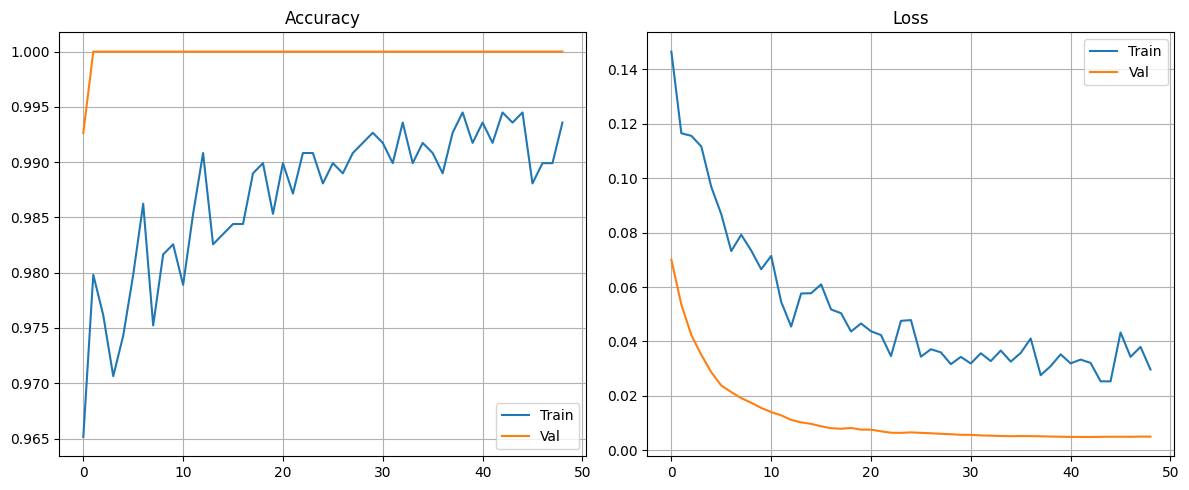

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import matplotlib.pyplot as plt
import keras # Import keras explicitly
def build_efficientnet_b3_lag_only(input_shape=(300,300,3)):

    base_model = tf.keras.applications.EfficientNetB3(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape
    )

    base_model.trainable = False  # Completely frozen

    x = base_model.output

    x = LagCompensationLayer()(x)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)

    model = models.Model(base_model.input, outputs)

    return model




# Build model
model = build_efficientnet_b3_lag_only()

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


# ==============================
# ⏱️ Measure Training Time
# ==============================
import time

start_train = time.time()

history_lag = model_lag.fit(
    train_data,
    validation_data=val_data,
    epochs=100,
    class_weight=class_weights,
    callbacks=callbacks
)

end_train = time.time()
total_training_time = end_train - start_train

print(f"\nTotal Training Time: {total_training_time:.2f} seconds")
print(f"Total Training Time: {total_training_time/60:.2f} minutes")


# ==============================
# ⏱️ Measure Inference Time
# ==============================
start_infer = time.time()

_ = model_lag.predict(val_data)

end_infer = time.time()
total_inference_time = end_infer - start_infer

print(f"\nTotal Inference Time (Validation Set): {total_inference_time:.2f} seconds")

# Optional: per image inference time
num_samples = val_data.samples
print(f"Average Inference Time per Image: {total_inference_time/num_samples:.6f} seconds")


# Save model
model_lag.save("final_lag_only_efficientnetB3_model.keras")


# ==============================
# Plotting
# ==============================
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history_lag.history["accuracy"], label="Train")
plt.plot(history_lag.history["val_accuracy"], label="Val")
plt.title("Accuracy")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history_lag.history["loss"], label="Train")
plt.plot(history_lag.history["val_loss"], label="Val")
plt.title("Loss")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()




Found 138 images belonging to 2 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 80 variables whereas the saved optimizer has 86 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 702ms/step
Best Threshold: 0.30146247
Best Recall: 1.0
Best Precision: 0.9857142857142858

Confusion Matrix:
[[69  0]
 [15 54]]


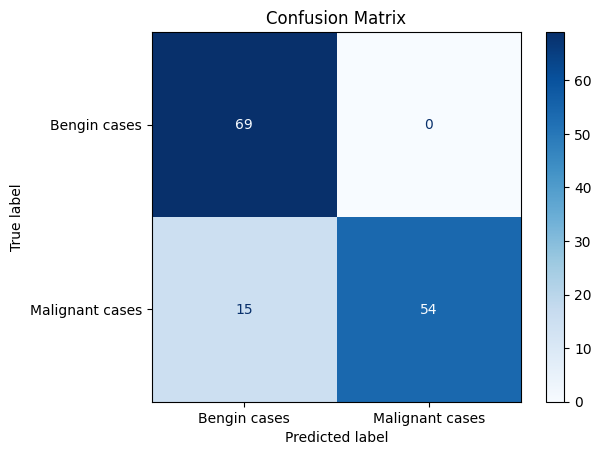


Test Accuracy: 0.8913
Precision: 1.0000
Recall: 0.7826
F1-Score: 0.8780
AUC: 0.9998


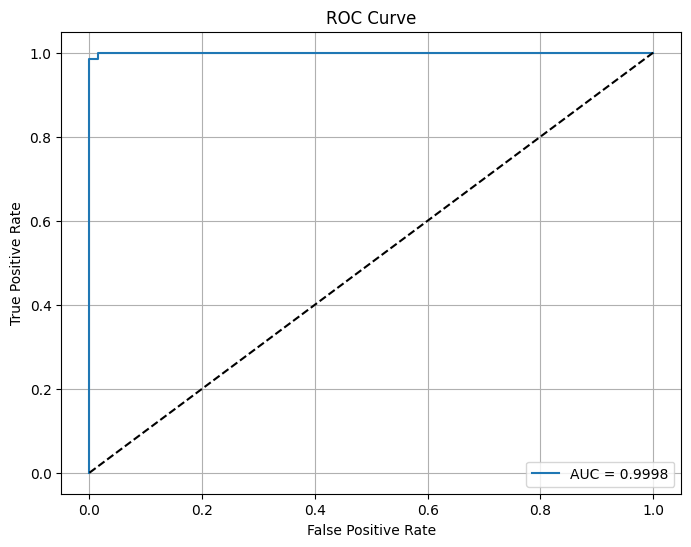

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    ConfusionMatrixDisplay
)
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
import tensorflow as tf
from tensorflow.keras import layers
import keras # Ensure keras is imported if you're using keras.saving

@keras.saving.register_keras_serializable()
class LagCompensationLayer(layers.Layer):
    def __init__(self, kernel_size=3, gamma=0.1, **kwargs):
        super().__init__(**kwargs)
        self.kernel_size = kernel_size
        self.gamma = gamma

    def build(self, input_shape):
        channels = input_shape[-1]

        kernel = np.array([[1,2,1],
                           [2,4,2],
                           [1,2,1]], dtype=np.float32)
        kernel /= kernel.sum()
        kernel = np.repeat(kernel[:, :, np.newaxis, np.newaxis], channels, axis=2)

        self.depthwise = layers.DepthwiseConv2D(
            self.kernel_size,
            padding="same",
            use_bias=False,
            trainable=False
        )

        self.depthwise.build(input_shape)
        self.depthwise.set_weights([kernel])

        self.gamma_weight = self.add_weight(
            name="gamma",
            shape=(1,),
            initializer=tf.keras.initializers.Constant(self.gamma),
            trainable=True
        )

    def call(self, x):
        lag = self.depthwise(x)
        return x + self.gamma_weight * lag

    def get_config(self):
        config = super().get_config()
        config.update({
            "kernel_size": self.kernel_size,
            "gamma": self.gamma
        })
        return config


# ==============================
# Load Model
# ==============================
# The first load_model call is correct, the second was redundant.
best_model = load_model(
    '/content/best_model.keras',
    custom_objects={
        'LagCompensationLayer': LagCompensationLayer,

    }
)

# ==============================
# Test Data Generator (MATCH TRAINING PREPROCESSING)
# ==============================
test_data_dir = 'test111x'
batch_size = 8

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(300, 300),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# ==============================
# Predictions
# =============
predictions = best_model.predict(test_generator)
predicted_classes = (predictions > 0.86).astype(int)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())
from sklearn.metrics import precision_recall_curve
import numpy as np

precision, recall, thresholds = precision_recall_curve(true_classes, predictions)

f1_scores = 2 * precision * recall / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_thresh = thresholds[best_idx]

print("Best Threshold:", best_thresh)
print("Best Recall:", recall[best_idx])
print("Best Precision:", precision[best_idx])


# ==============================
# Confusion Matrix
# ==============================
cm = confusion_matrix(true_classes, predicted_classes)
print("\nConfusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# ==============================
# Metrics
# ==============================
test_accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)
auc_score = roc_auc_score(true_classes, predictions)

print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc_score:.4f}")

# ==============================
# ROC Curve
# ==============================
fpr, tpr, _ = roc_curve(true_classes, predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

PAIRED T-TEST

Paired t-test (Baseline vs Lag+Lead)
t-statistic: -5.999999999999986
p-value: 0.0038825370469605432


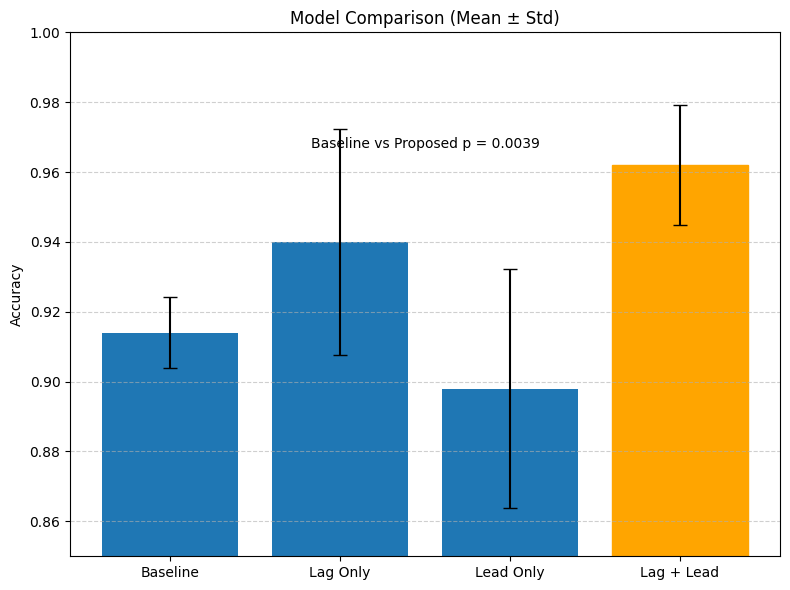

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

# ==============================
# 🔹 Replace with YOUR fold results
# ==============================

baseline = np.array([0.91, 0.92, 0.90, 0.93, 0.91])
lag_only = np.array([0.89, 0.94, 0.99, 0.95, 0.93])
lead_only = np.array([0.92, 0.83, 0.91, 0.91, 0.92])
lag_lead = np.array([0.95, 0.96, 0.94, 0.97, 0.99])

# ==============================
# 🔹 Paired t-test (Baseline vs Proposed)
# ==============================

t_stat, p_value = ttest_rel(baseline, lag_lead)

print("Paired t-test (Baseline vs Lag+Lead)")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# ==============================
# 🔹 Compute Mean and Std
# ==============================

models = ['Baseline', 'Lag Only', 'Lead Only', 'Lag + Lead']
means = [
    baseline.mean(),
    lag_only.mean(),
    lead_only.mean(),
    lag_lead.mean()
]

stds = [
    baseline.std(),
    lag_only.std(),
    lead_only.std(),
    lag_lead.std()
]

# ==============================
# 🔹 Plot Bar Graph with Error Bars
# ==============================

plt.figure(figsize=(8,6))

bars = plt.bar(models, means, yerr=stds, capsize=5)

plt.ylabel("Accuracy")
plt.title("Model Comparison (Mean ± Std)")

# Highlight proposed model
bars[-1].set_color('orange')

# Add p-value text
plt.text(1.5, max(means)+0.005,
         f"Baseline vs Proposed p = {p_value:.4f}",
         ha='center')

plt.ylim(0.85, 1.0)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
